In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path = "./data/strains_growth_curve.xlsx"
df = pd.read_excel(file_path, sheet_name='growth')

In [54]:
df.columns = df.columns.str.strip()
df['Strain'] = df['Strain'].astype(str).str.strip()

In [60]:
strain_name_dict = {
    "3260": "L. casei 3260",
    "3594": "L. reuteri 3594",
    "SJ_P2": "L. plantarum JCM 1149",
    "3104": "L. plantarum 3104",
    "53103": "L. rhamnosus L-GG",
}

In [61]:
strain_order = ["3260", "3594", "SJ_P2", "3104", "53103",]
treatment_order = ["Control", "Artichoke"]
treatment_colors = ["white", "black"]

In [62]:
df = df[df['Strain'].isin(strain_order)]
df['Strain'] = pd.Categorical(df['Strain'], categories=strain_order, ordered=True)
df['Treatment'] = pd.Categorical(df['Treatment'], categories=treatment_order, ordered=True)
df['Time'] = pd.Categorical(df['Time'], ordered=True, categories=sorted(df['Time'].unique(), key=lambda x: int(x.replace("h", ""))))

In [63]:
df['Strain_Full'] = df['Strain'].map(strain_name_dict)
full_strain_order = [strain_name_dict[s] for s in strain_order]
df['Strain_Full'] = pd.Categorical(df['Strain_Full'], categories=full_strain_order, ordered=True)

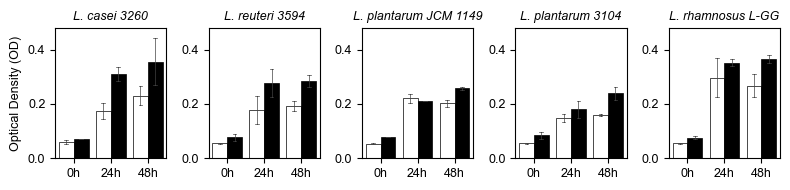

In [ ]:
num_strains = len(full_strain_order)
plt.figure(figsize=(8, 2))

for i, strain in enumerate(full_strain_order):
    plt.subplot(1, num_strains, i + 1)
    df_strain = df[df['Strain_Full'] == strain]
    
    sns.barplot(
        data=df_strain,
        x='Time',
        y='OD',
        hue='Treatment',
        hue_order=treatment_order,
        palette=treatment_colors,
        edgecolor='black',
        linewidth=0.5,
        ci='sd',
        capsize=0.2,
        errwidth=0.5
    )
    
    plt.title(strain, fontsize=9, fontstyle='italic')
    plt.ylim(0, 0.48)  # Y축 고정
    plt.xticks(fontsize=9, rotation=0)
    plt.yticks(fontsize=9)
    plt.xlabel('')

    if i % num_strains == 0:
        plt.ylabel("Optical Density (OD)", fontsize=9)
    else:
        plt.ylabel("")
    

    plt.legend().remove()

plt.tight_layout()
plt.savefig('growth_r.png', dpi=600)
plt.show()
